In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf

In [281]:
!pip install --upgrade "https://github.com/PennyWieser/DiadFit/archive/refs/tags/0.0.11.zip"

  Using cached https://github.com/PennyWieser/DiadFit/archive/refs/tags/0.0.11.zip


In [282]:
pf.__version__

'0.0.11'

## Example of how to convert splittings using DiadFit

In [283]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'calibri'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

In [284]:
data=pd.read_excel('La Palma_Fluid Inclusions_forMonteCarlo.xlsx', sheet_name='Corrected_Splitting')
data.head()

ValueError: Worksheet named 'Corrected_Splitting' not found

In [ ]:
densities=pf.calculate_density_cornell(temp='SupCrit', Split=data['Splitting'])
densities.head()

## Okay, lets start with the densities you used, you can check they are the same later

In [285]:
df=pd.read_excel('La Palma_Fluid Inclusions_forMonteCarlo.xlsx', sheet_name='Sheet1')
df.head()

,SAMPLE,FileName,T_C,Pressure (Mpa),Updated,Density_g_cm3,SAMPLE.1,Comment,Na2O,MgO,...,TiO2,FeO,MnO,Cr2O3,NiO,Total,MgO Molar,FeO Molar,Fo,DEPTH
0,NaN,65 LM6 G9 FI1,NaN,NaN,NaN,0.835594,NaN,DECORATED,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,03 LM0 G1 FI1,1150.0,623.416987,yes,0.875343,0.0,LM0_G1_RIM,0.009036,42.12351,...,0.034901,17.91823,0.292019,0.078602,0.190220,100.7912,1.045134,0.249405,0.807341,22.242650
2,0.0,06 LM0 G2 FI1,1150.0,488.537029,yes,0.780430,0.0,LM0_G2_CENTER,0.009698,44.42279,...,0.022287,15.26419,0.225410,0.018465,0.194827,100.1963,1.102182,0.212463,0.838388,17.430321
3,0.0,17 LM0 G3 FI3,1150.0,725.586902,yes,0.936785,0.0,LM0_G3_CENTER,0.011004,45.31343,...,0.018161,14.36721,0.216594,0.065003,0.260763,101.1633,1.124280,0.199978,0.848989,25.887930
4,0.0,11 LM0 G3 FI1 (CRR),1150.0,711.652960,yes,0.928828,0.0,LM0_G3_CENTER,0.011004,45.31343,...,0.018161,14.36721,0.216594,0.065003,0.260763,101.1633,1.124280,0.199978,0.848989,25.390786


In [286]:
#df.to_excel('Your_choosen_name.xlsx')

In [287]:
P_linspace=np.linspace(0, 10, 100)
Depth_calc_2step=pf.loop_pressure_depth_2step(P_kbar=P_linspace,
            d1=14, rho1=2800, rho2=3100)
Depth_calc_3step=pf.loop_pressure_depth_3step(P_kbar=P_linspace,
            d1=5, d2=14, rho1=2700, rho2=2900, rho3=3100)

depth_constant=10**(-3)*(P_linspace*100000000)/(2900*9.8)

findfont: Font family ['calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['calibri'] not found. Falling back to DejaVu Sans.


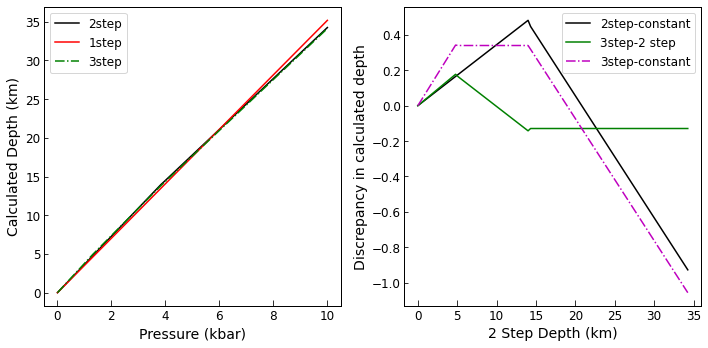

In [288]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(P_linspace, Depth_calc_2step, '-k', label='2step')
ax1.plot(P_linspace, depth_constant, '-r', label='1step')
ax1.plot(P_linspace, Depth_calc_3step, '-.g', label='3step')
ax1.legend()
ax2.plot(Depth_calc_2step, Depth_calc_2step-depth_constant, '-k', label='2step-constant')

ax2.plot(Depth_calc_2step, Depth_calc_3step-Depth_calc_2step, '-g', label='3step-2 step')
ax2.plot(Depth_calc_2step, Depth_calc_3step-depth_constant, '-.m', label='3step-constant')

ax2.legend()
ax2.set_ylabel('Discrepancy in calculated depth')
ax1.set_xlabel('Pressure (kbar)')
ax2.set_xlabel('2 Step Depth (km)')
ax1.set_ylabel('Calculated Depth (km)')
fig.tight_layout()

## Loading earthquake depths

In [289]:
EQs=pd.read_excel('IGN La Palma Quakes 2017 to 2022 (1).xlsx')

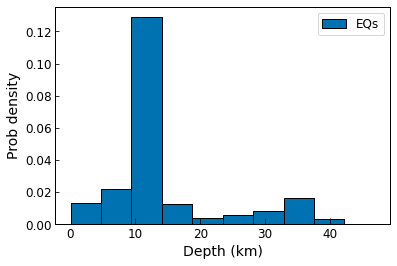

In [290]:
plt.hist(EQs['Depth'], density=True, ec='black', label='EQs')
plt.ylabel('Prob density')
plt.xlabel('Depth (km)')
plt.legend()

## Monte-Carlo simulations for them all

In [291]:
Av_df_3step=pf.loop_all_FI_MC(T_K=1150+273.15,
                        CO2_density_gcm3=df['Density_g_cm3'],
                        sample_ID=df['FileName'],
                        crust_dens_kgm3='three-step', 
                         d1=5, d2=14, rho1=2700, rho2=2900,  rho3=3100,
                        N_dup=1000,
                        error_T_K=30, 
                        error_CO2_dens=0.0116, 
                        error_crust_dens=0,
                    error_type_T_K='Abs', error_dist_T_K='normal',
                    error_type_CO2_dens='Norm', error_dist_CO2_dens='normal',
                    error_type_crust_dens='Abs', 
                    error_dist_crust_dens='uniform',
                    plot_figure=False)
Av_df_3step.head()

working on sample number 0
working on sample number 20
working on sample number 40
working on sample number 60
working on sample number 80
working on sample number 100


,Filename,SingleFI_D_km,std_dev_MC_D_km,SingleFI_P_kbar,std_dev_MC_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,error_T_K,error_CO2_dens,error_crust_dens
0,65 LM6 G9 FI1,19.108013,0.661344,5.436574,0.200916,5.434859,5.427871,19.102366,19.079364,30,0.0116,0
1,03 LM0 G1 FI1,21.018521,0.740233,6.016987,0.224883,6.016681,6.009624,21.017515,20.994286,30,0.0116,0
2,06 LM0 G2 FI1,16.708174,0.566669,4.707503,0.172154,4.709140,4.705776,16.713561,16.702489,30,0.0116,0
3,17 LM0 G3 FI3,24.293724,0.783250,7.011993,0.237951,7.014582,7.008120,24.302245,24.280974,30,0.0116,0
4,11 LM0 G3 FI1 (CRR),23.846563,0.764472,6.876146,0.232247,6.889347,6.892682,23.890017,23.900993,30,0.0116,0


In [299]:
Av_df_2step=pf.loop_all_FI_MC(T_K=1150+273.15,
                        CO2_density_gcm3=df['Density_g_cm3'],
                        sample_ID=df['FileName'],
                        crust_dens_kgm3='two-step', 
                         d1=14, rho1=2800, rho2=3100,
                        N_dup=1000,
                        error_T_K=30, 
                        error_CO2_dens=0.0116, 
                        error_crust_dens=0,
                    error_type_T_K='Abs', error_dist_T_K='normal',
                    error_type_CO2_dens='Norm', error_dist_CO2_dens='normal',
                    error_type_crust_dens='Abs', 
                    error_dist_crust_dens='uniform',
                    plot_figure=False)
Av_df_2step.head()

working on sample number 0
working on sample number 20
working on sample number 40
working on sample number 60
working on sample number 80
working on sample number 100


,Filename,SingleFI_D_km,std_dev_MC_D_km,SingleFI_P_kbar,std_dev_MC_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,error_T_K,error_CO2_dens,error_crust_dens
0,65 LM6 G9 FI1,19.237177,0.659982,5.436574,0.200502,5.440510,5.436791,19.250133,19.237889,30,0.0116,0
1,03 LM0 G1 FI1,21.147685,0.759254,6.016987,0.230661,6.020540,6.008539,21.159381,21.119878,30,0.0116,0
2,06 LM0 G2 FI1,16.837338,0.560045,4.707503,0.170142,4.710376,4.709674,16.846795,16.844484,30,0.0116,0
3,17 LM0 G3 FI3,24.422888,0.830419,7.011993,0.252281,7.012219,7.007798,24.423630,24.409079,30,0.0116,0
4,11 LM0 G3 FI1 (CRR),23.975727,0.828332,6.876146,0.251647,6.882998,6.878888,23.998283,23.984753,30,0.0116,0


In [300]:
Av_df_2step.to_excel('Montecarlofinal0.0116.xlsx')

In [301]:
Av_df_fixed_rho=pf.loop_all_FI_MC(T_K=1150+273.15,
                        CO2_density_gcm3=df['Density_g_cm3'],
                        sample_ID=df['FileName'],
                        crust_dens_kgm3=2900, 
                        N_dup=1000,
                        error_T_K=30, 
                        error_CO2_dens=0.0116, 
                        error_crust_dens=0,
                    error_type_T_K='Abs', error_dist_T_K='normal',
                    error_type_CO2_dens='Norm', error_dist_CO2_dens='normal',
                    error_type_crust_dens='Abs', 
                    error_dist_crust_dens='uniform',
                    plot_figure=False)
Av_df_fixed_rho.head()

working on sample number 0
working on sample number 20
working on sample number 40
working on sample number 60
working on sample number 80
working on sample number 100


,Filename,SingleFI_D_km,std_dev_MC_D_km,SingleFI_P_kbar,std_dev_MC_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,Mean_MC_D_km,Med_MC_D_km,error_T_K,error_CO2_dens,error_crust_dens
0,65 LM6 G9 FI1,19.129396,0.720955,5.436574,0.204896,5.452812,5.447295,19.186531,19.167117,30,0.0116,0
1,03 LM0 G1 FI1,21.171664,0.800292,6.016987,0.227443,6.026781,6.013061,21.206127,21.157850,30,0.0116,0
2,06 LM0 G2 FI1,16.564051,0.647613,4.707503,0.184052,4.707993,4.706063,16.565773,16.558982,30,0.0116,0
3,17 LM0 G3 FI3,24.672742,0.868898,7.011993,0.246941,7.005223,7.007285,24.648918,24.656176,30,0.0116,0
4,11 LM0 G3 FI1 (CRR),24.194743,0.874422,6.876146,0.248511,6.870851,6.863989,24.176112,24.151967,30,0.0116,0


In [306]:
with pd.ExcelWriter("Monte_Carlo_Outputs_0116.xlsx") as writer:
   
    # use to_excel function and specify the sheet_name and index
    # to store the dataframe in specified sheet
    Av_df_fixed_rho.to_excel(writer, sheet_name="Fixed Density", index=False)
    Av_df_2step.to_excel(writer, sheet_name="Two Step", index=False)
    Av_df_3step.to_excel(writer, sheet_name="Three Step", index=False)

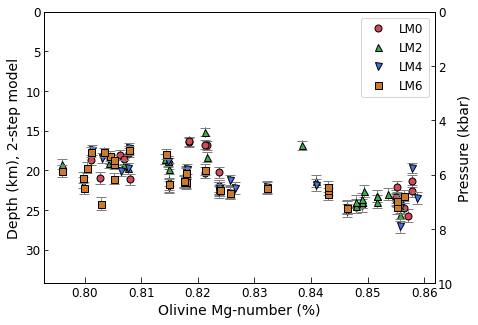

In [307]:
## Making a plot for 2 step densities
real=(Av_df_2step['SingleFI_D_km']>0) & (Av_df_2step['std_dev_MC_D_km']>0) & (df['Fo']>0)
LM0=df['SAMPLE']==0
LM2=df['SAMPLE']==2
LM4=df['SAMPLE']==4
LM6=df['SAMPLE']==6
fig, (ax1) = plt.subplots(1, 1, figsize=(7,5), sharey=True)

ax1.errorbar(df['Fo'].loc[real&Sample0], 
             Av_df_2step['SingleFI_D_km'].loc[real&Sample0],
             xerr=0, yerr=Av_df_2step['std_dev_MC_D_km'].loc[real&Sample0],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=5)

ax1.plot(df['Fo'].loc[Sample0], 
             Av_df_2step['SingleFI_D_km'].loc[Sample0], 'o', mfc='#d44958', mec='k', markersize='7',label='LM0')




ax1.errorbar(df['Fo'].loc[real&Sample2], 
             Av_df_2step['SingleFI_D_km'].loc[real&Sample2],
             xerr=0, yerr=Av_df_2step['std_dev_MC_D_km'].loc[real&Sample2],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=5)

ax1.plot(df['Fo'].loc[Sample2], 
             Av_df_2step['SingleFI_D_km'].loc[Sample2], '^', mfc='#3dae46', mec='k', markersize='7', label='LM2')


ax1.errorbar(df['Fo'].loc[real&Sample4], 
             Av_df_2step['SingleFI_D_km'].loc[real&Sample4],
             xerr=0, yerr=Av_df_2step['std_dev_MC_D_km'].loc[real&Sample4],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=5)

ax1.plot(df['Fo'].loc[Sample4], 
             Av_df_2step['SingleFI_D_km'].loc[Sample4],'v', mfc='#4270dd',mec='k',markersize='7', label='LM4')



ax1.errorbar(df['Fo'].loc[real&Sample6], 
             Av_df_2step['SingleFI_D_km'].loc[real&Sample6],
             xerr=0, yerr=Av_df_2step['std_dev_MC_D_km'].loc[real&Sample6],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=5)

ax1.plot(df['Fo'].loc[Sample6], 
             Av_df_2step['SingleFI_D_km'].loc[Sample6], 's', mfc='#cc7929',mec='k',markersize='7', label='LM6')

ax1.legend()




# Can add second axis, to show pressure for the 2 step model
ax2=ax1.twinx()
# Then have to use model to get pressure to depth. 

# Adjust this part here, dont change the next few lines to make sure they all align.
# Eg. Whatever axis you want, set here
P_linspace=np.linspace(0, 10, 100)
Depth=pf.loop_pressure_depth_2step(P_kbar=P_linspace, d1=14, rho2=3100, rho1=2800)
ax1.set_ylim([Depth[0], Depth[-1]])
ax2.set_ylim([P_linspace[0], P_linspace[-1]])
ax1.set_ylabel('Depth (km), 2-step model')
ax1.set_xlabel('Olivine Mg-number (%)')
ax2.set_ylabel('Pressure (kbar)')

ax1.invert_yaxis()
ax2.invert_yaxis()

fig.savefig('MonteCarlo_0.0116.tif', dpi=600)
